In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import scipy
from scipy.signal import periodogram

import functions as f


Plot of humidity in Szeged for datetime range: 2006-04-01 to 2006-04-09

In [25]:
file_path_weather = '/home/andjela/projects/humidity project/weatherHistory.csv'
df = pd.read_csv(file_path_weather)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [20]:
# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')


/tmp/ipykernel_7993/3930879111.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')


In [21]:
start_date = '2006-04-01 00:00:00.000 +0200'
end_date = '2006-04-09 23:00:00.000 +0200'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S.%f %z')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S.%f %z')

In [24]:
mask = (df['Formatted Date'] >= start_date) & (df['Formatted Date'] <= end_date)
filtered_df = df.loc[mask]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            216 non-null    object 
 1   Summary                   216 non-null    object 
 2   Precip Type               216 non-null    object 
 3   Temperature (C)           216 non-null    float64
 4   Apparent Temperature (C)  216 non-null    float64
 5   Humidity                  216 non-null    float64
 6   Wind Speed (km/h)         216 non-null    float64
 7   Wind Bearing (degrees)    216 non-null    float64
 8   Visibility (km)           216 non-null    float64
 9   Loud Cover                216 non-null    float64
 10  Pressure (millibars)      216 non-null    float64
 11  Daily Summary             216 non-null    object 
dtypes: float64(8), object(4)
memory usage: 21.9+ KB


This plot is showing us level of air humidity in Szeged from 2006-04-01 to 2006-04-09
Humidity value is float and Date is in datetime object format

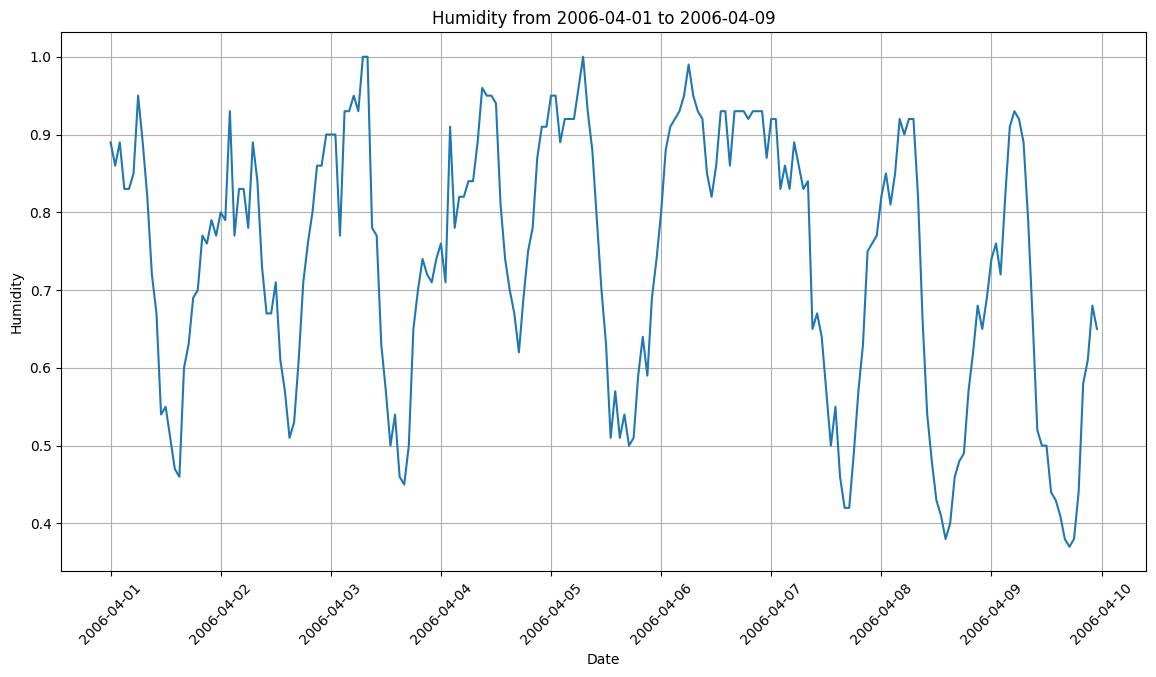

In [23]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Formatted Date', y='Humidity', data=filtered_df)
plt.title('Humidity from 2006-04-01 to 2006-04-09')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plot of absolute humidity in an Italian city for datetime range: 2004-03-10 to 2004-03-31

In [79]:

file_path_air = '/home/andjela/projects/humidity project/air_quality.xlsx'
df_air = pd.read_excel(file_path_air)
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [80]:
df_air['Date'] = df_air['Date'].astype(str) #converting it to string
df_air['Time'] = df_air['Time'].astype(str)

df_air['DateTime'] = pd.to_datetime(df_air['Date'] + ' ' + df_air['Time']) #merging data and time column into one

df_air.set_index('DateTime', inplace=True) #setting DateTime as and index

df_air.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [81]:
start_datetime = '2004-03-10 00:00:00'
end_datetime = '2004-03-31 23:00:00'
filtered_data = df_air.loc[start_datetime:end_datetime, 'AH']

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values,  color='green')
plt.xlabel('DateTime')
plt.ylabel('AH')
plt.title('Absolute humidity (AH) from 2004-03-10 to 2004-03-31')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

<IPython.core.display.Javascript object>

Humidity sensors plot for datetime range from 2004-03-10 to 2004-03-31

In [83]:
file_path_temp = '/home/andjela/projects/humidity project/log_temp.csv'
df_temp = pd.read_csv(file_path_temp)
df_temp.head()

,3/14/19,19:33:07,T=22.0,H=20.0
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0


In [84]:
new_column_names = ['date', 'time', 'temperature', 'humidity']  # new column names

df_temp.columns = new_column_names

df_temp.head()

,date,time,temperature,humidity
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0


In [85]:
df_temp['DateTime'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])
df_temp.head()

/tmp/ipykernel_392/568639142.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp['DateTime'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])


,date,time,temperature,humidity,DateTime
0,3/14/19,19:38:10,T=22.0,H=20.0,2019-03-14 19:38:10
1,3/14/19,19:43:11,T=22.0,H=26.0,2019-03-14 19:43:11
2,3/14/19,19:48:14,T=22.0,H=26.0,2019-03-14 19:48:14
3,3/14/19,19:53:15,T=22.0,H=20.0,2019-03-14 19:53:15
4,3/14/19,19:58:15,T=22.0,H=23.0,2019-03-14 19:58:15


In [86]:

df_temp['humidity'] = df_temp['humidity'].astype(str).str.extract(r'H=(\d+\.\d)').astype(float)


In [87]:
start_datetime = '2019-03-14 00:00:00'
end_datetime = '2019-03-14 23:58:41'
filtered_data = df_temp[(df_temp['DateTime'] >= start_datetime) & (df_temp['DateTime'] < end_datetime)]
filtered_data.head()

,date,time,temperature,humidity,DateTime
0,3/14/19,19:38:10,T=22.0,20.0,2019-03-14 19:38:10
1,3/14/19,19:43:11,T=22.0,26.0,2019-03-14 19:43:11
2,3/14/19,19:48:14,T=22.0,26.0,2019-03-14 19:48:14
3,3/14/19,19:53:15,T=22.0,20.0,2019-03-14 19:53:15
4,3/14/19,19:58:15,T=22.0,23.0,2019-03-14 19:58:15


In [88]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['humidity'], marker='o', linestyle='-', color='red')
plt.xlabel('DateTime')
plt.ylabel('Humidity')
plt.title('Humidity for 2019-03-14')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [82]:
file_path_soil = '/home/andjela/projects/humidity project/humi_soil.csv'
df_soil = pd.read_csv(file_path_soil)
df_soil.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [ ]:
#Convert columns to string first before concatenation

'''datetime_str = (df_soil['year'].astype(str) + '-' +
                df_soil['month'].astype(str).str.zfill(2) + '-' +
                df_soil['day'].astype(str).str.zfill(2) + ' ' +
                df_soil['hour'].astype(str).str.zfill(2) + ':' +
                df_soil['minute'].astype(str).str.zfill(2) + ':' +
                df_soil['second'].astype(str).str.zfill(2))

df_soil['DateTime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M:%S')

#df_soil['DateTime'] = pd.to_datetime(df_soil['year'] + ' ' + df_soil['month']+ ' ' + df_soil['day']+ ' ' + df_soil['hour']+ ' ' + df_soil['minute']+ ' ' + df_soil['second'])
df_soil.head()'''

In [83]:
print(df_soil.columns)

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'moisture0',
       'moisture1', 'moisture2', 'moisture3', 'moisture4', 'irrgation'],
      dtype='object')


In [97]:
#df_soil['DateTime'] = None
df_soil['DateTime'] = pd.to_datetime(df_soil[['year', 'month', 'day', 'hour', 'minute', 'second']])
df_soil.head()
#df_soil.set_index('DateTime', inplace=True)



,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation,DateTime
DateTime,,,,,,,,,,,,,
2020-03-06 22:16:11,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False,2020-03-06 22:16:11
2020-03-06 22:17:11,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False,2020-03-06 22:17:11
2020-03-06 22:18:11,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False,2020-03-06 22:18:11
2020-03-06 22:19:11,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False,2020-03-06 22:19:11
2020-03-06 22:20:11,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False,2020-03-06 22:20:11


In [98]:
start_datetime = '2020-03-07 00:00:16'
end_datetime = '2020-03-07 23:59:29'
filtered_data = df_soil[(df_soil['DateTime'] >= start_datetime) & (df_soil['DateTime'] < end_datetime)]
#filtered_data = df_soil.loc[start_datetime:end_datetime, ['moisture0', 'moisture1', 'moisture2', 'moisture3', 'moisture4']]
filtered_data.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation,DateTime
DateTime,,,,,,,,,,,,,
2020-03-07 00:00:16,2020,3,7,0,0,16,0.23,0.31,0.29,0.11,0.02,False,2020-03-07 00:00:16
2020-03-07 00:01:17,2020,3,7,0,1,17,0.23,0.31,0.27,0.11,0.02,False,2020-03-07 00:01:17
2020-03-07 00:02:17,2020,3,7,0,2,17,0.22,0.31,0.29,0.11,0.02,False,2020-03-07 00:02:17
2020-03-07 00:03:17,2020,3,7,0,3,17,0.22,0.32,0.29,0.11,0.02,False,2020-03-07 00:03:17
2020-03-07 00:04:17,2020,3,7,0,4,17,0.22,0.33,0.29,0.11,0.02,False,2020-03-07 00:04:17


First five plots show us each moisture level of soil separetly for 24-hour range on 2020-03-07.
The 'DateTime' column represents the timestamp of each measurement. 

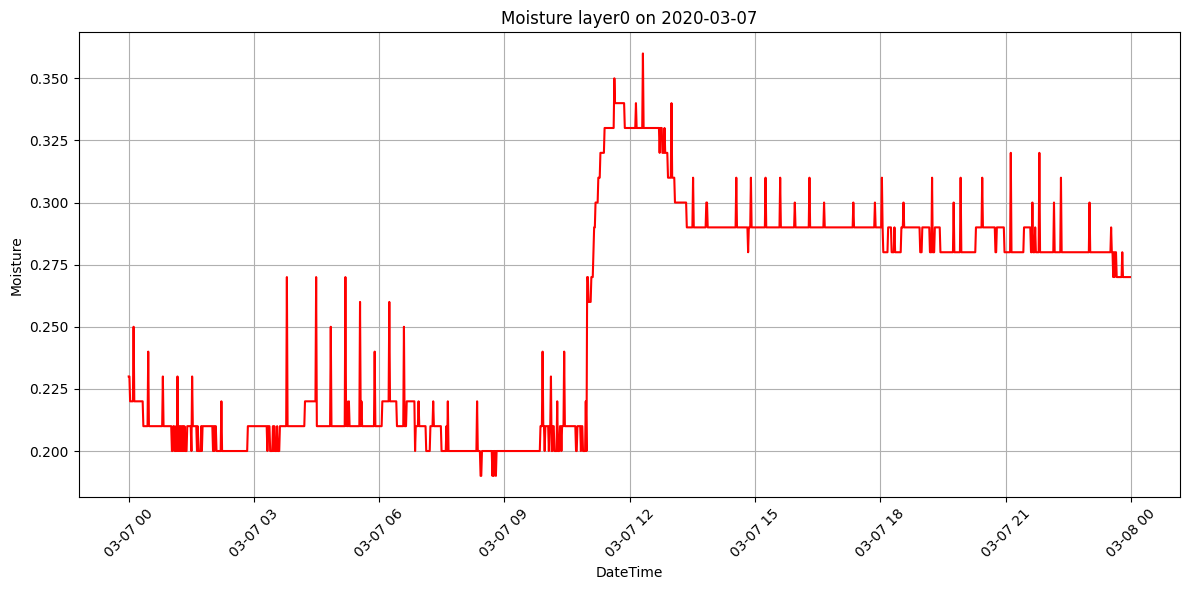

In [99]:
#1st plot
#Moisture level 0


plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['moisture0'],  color='red')
plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture layer0 on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

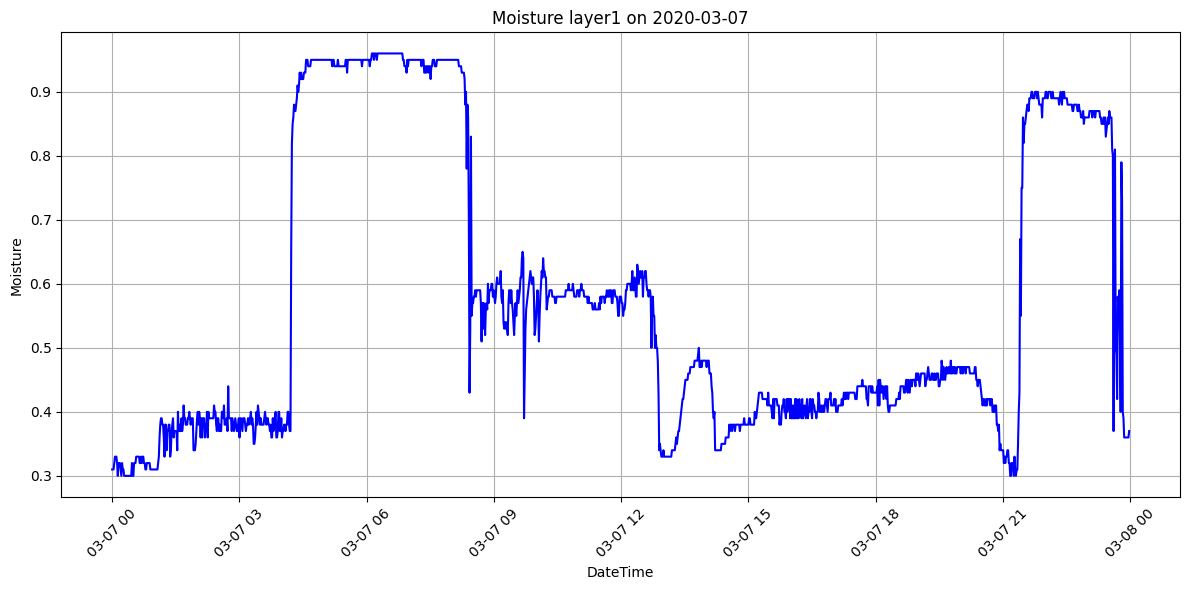

In [101]:
#2nd plot
#Moisture level 1

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['moisture1'],  color='blue')
plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture layer1 on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

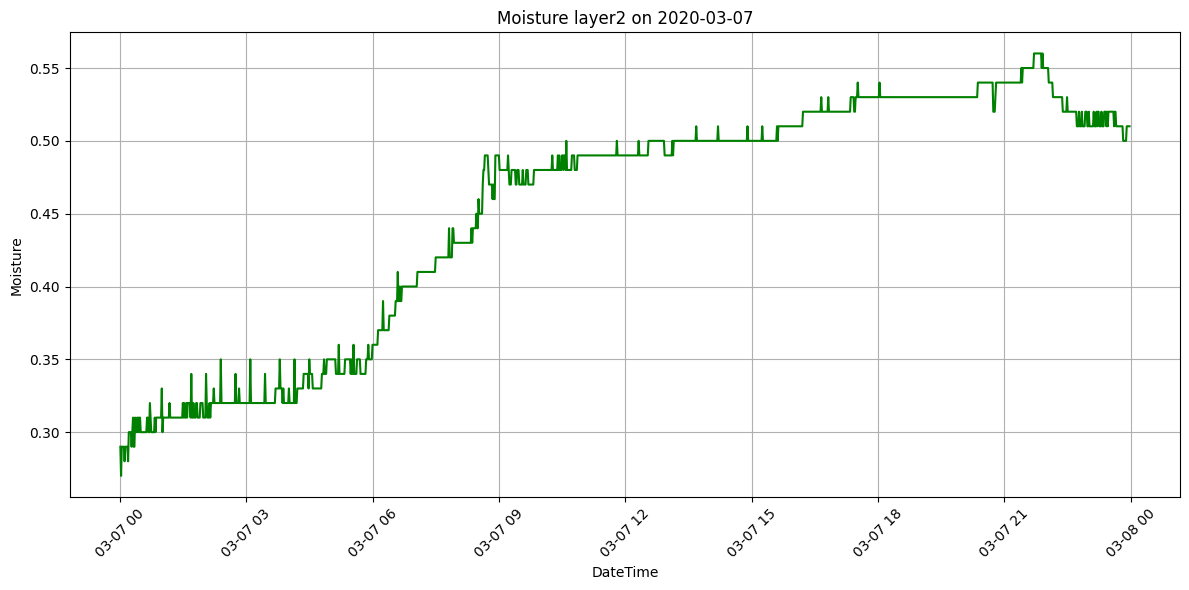

In [102]:
#3rd plot
#Moisture level 2

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['moisture2'],  color='green')
plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture layer2 on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

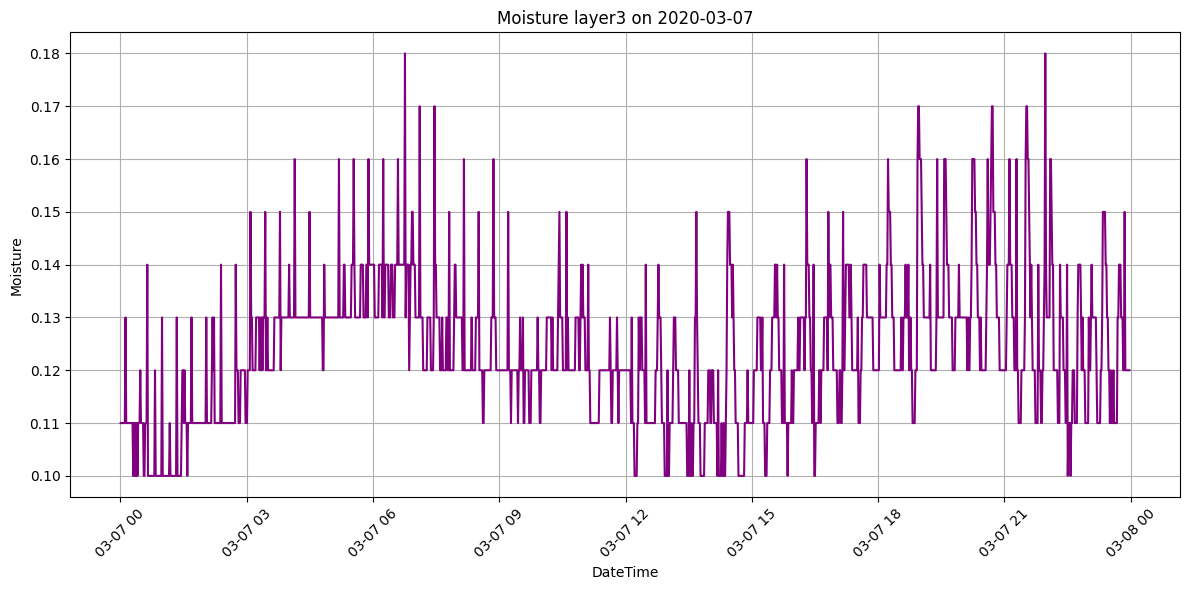

In [103]:
#4th plot
#Moisture level 3

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['moisture3'],  color='purple')
plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture layer3 on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

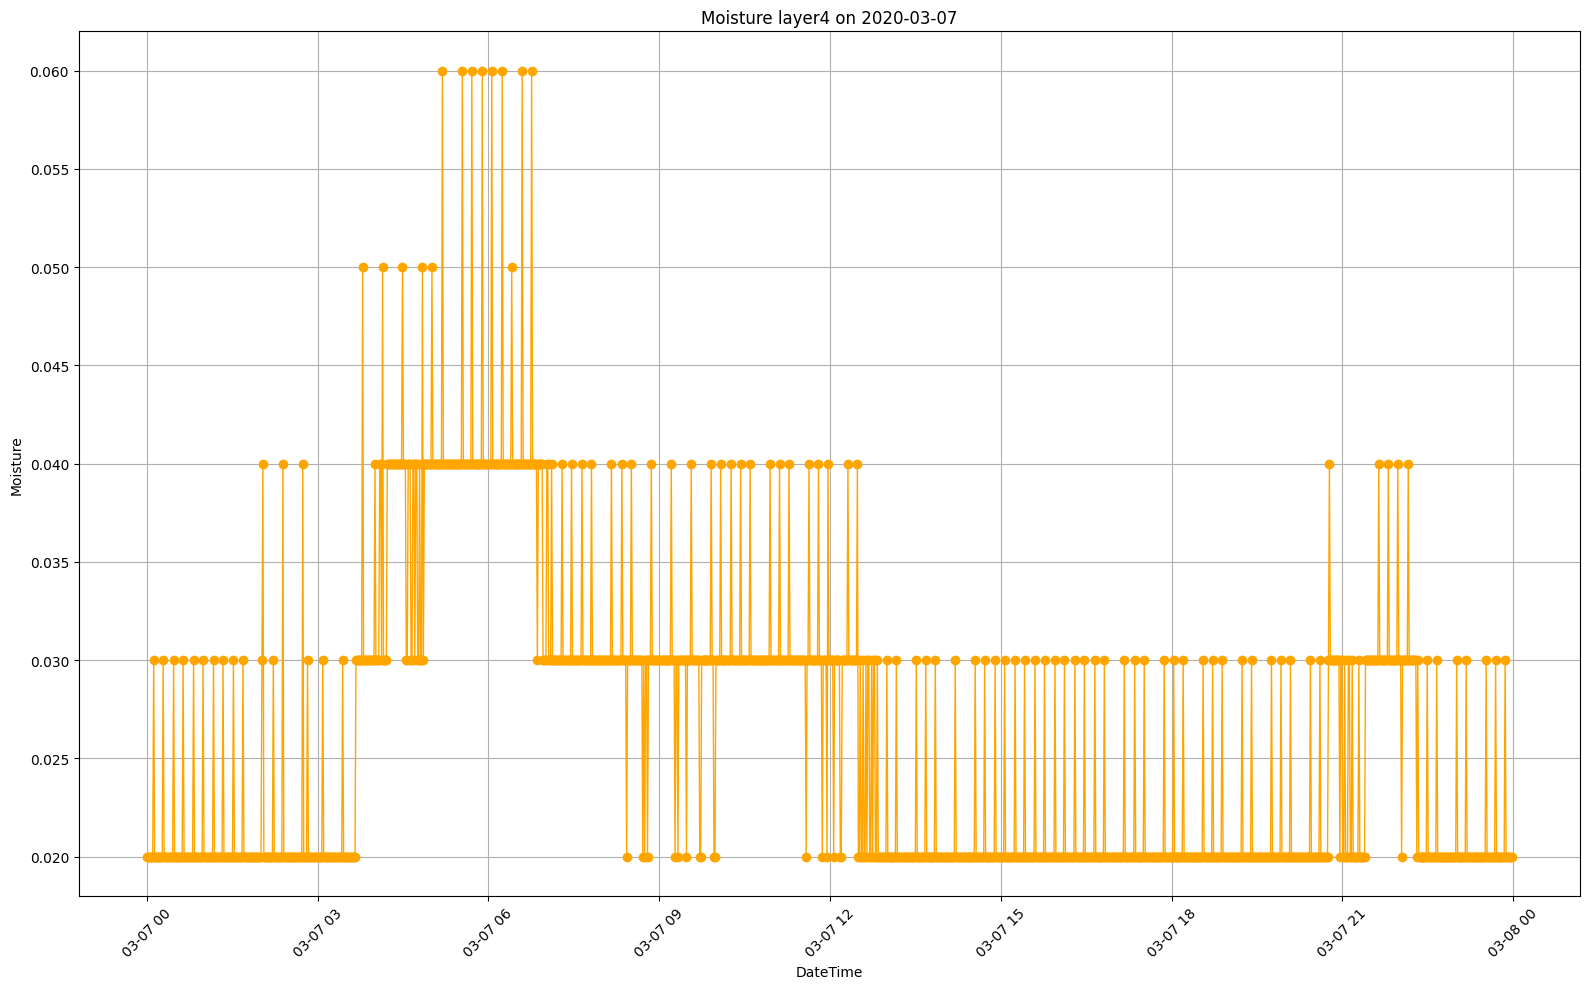

In [104]:
#5th plot
#Moisture level 4

plt.figure(figsize=(16, 10))
plt.plot(filtered_data['DateTime'], filtered_data['moisture4'],  marker='o', color='orange', linewidth=1)
plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture layer4 on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Linear plot for all five layers of soil over a 24-hour period on 2020-03-07
The 'DateTime' column represents the timestamp of each measurement. 

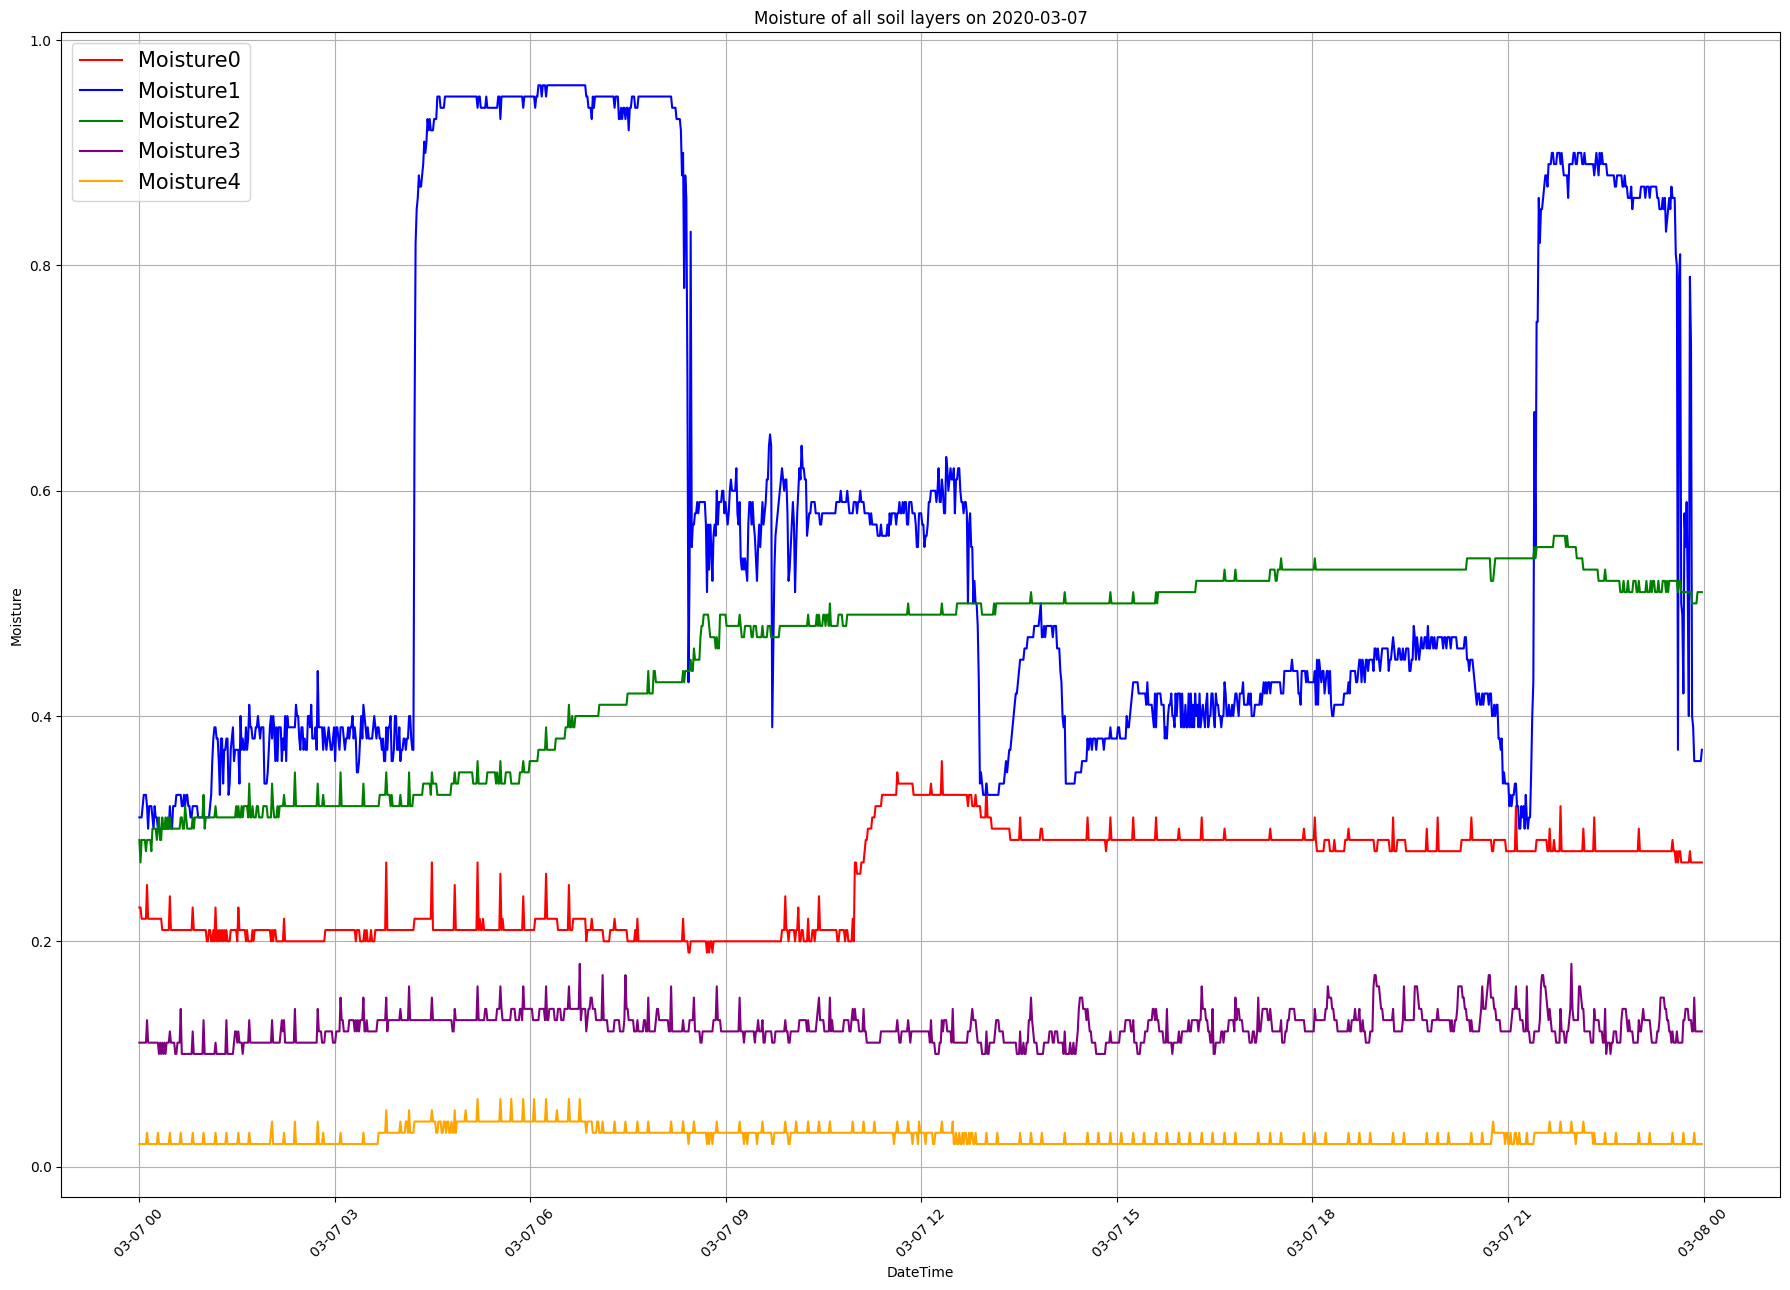

In [105]:
plt.figure(figsize=(18, 13))
plt.plot(filtered_data['DateTime'], filtered_data['moisture0'], color='red', label='Moisture0')
plt.plot(filtered_data['DateTime'], filtered_data['moisture1'], color='blue', label='Moisture1')
plt.plot(filtered_data['DateTime'], filtered_data['moisture2'], color='green', label='Moisture2')
plt.plot(filtered_data['DateTime'], filtered_data['moisture3'], color='purple', label='Moisture3')
plt.plot(filtered_data['DateTime'], filtered_data['moisture4'], color='orange', label='Moisture4')


plt.xlabel('DateTime')
plt.ylabel('Moisture')
plt.title('Moisture of all soil layers on 2020-03-07')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', fontsize=15)  

plt.tight_layout()
plt.show()

Plots of periodograms showing dominant frequency of each moisture level 


Dominant frequency for moisture0: 3.780146669690784e-06 Hz with power density 383.6673949470309
Dominant frequency for moisture1: 3.780146669690784e-06 Hz with power density 2347.1434514677258
Dominant frequency for moisture2: 3.780146669690784e-06 Hz with power density 340.09297696983873
Dominant frequency for moisture3: 7.560293339381568e-06 Hz with power density 9.63447985598297
Dominant frequency for moisture4: 1.5120586678763136e-05 Hz with power density 3.5288210351749223


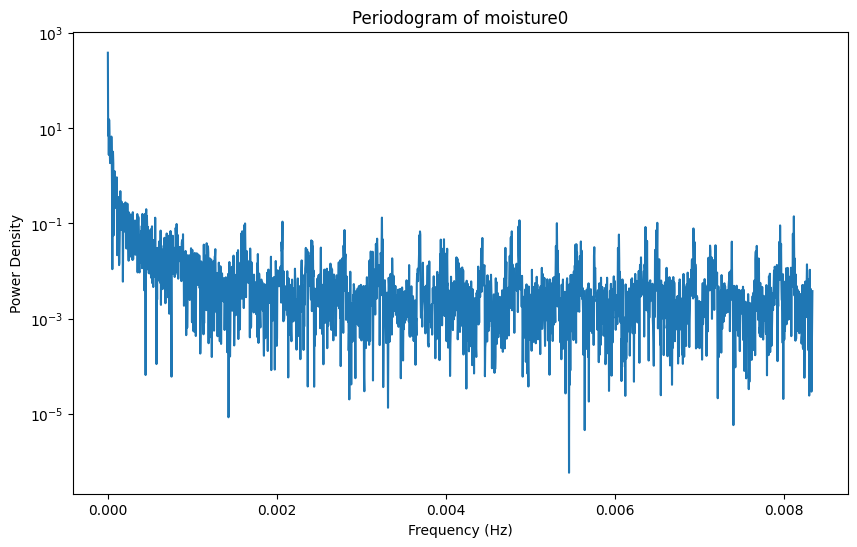

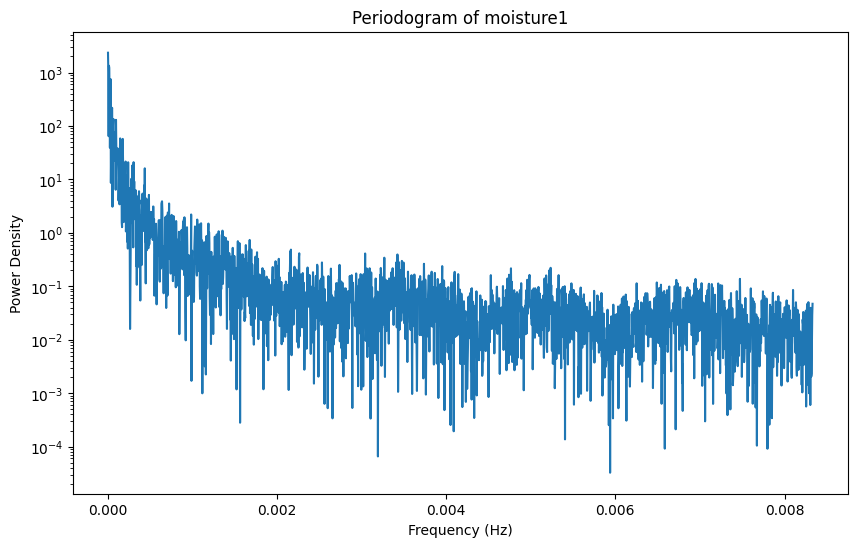

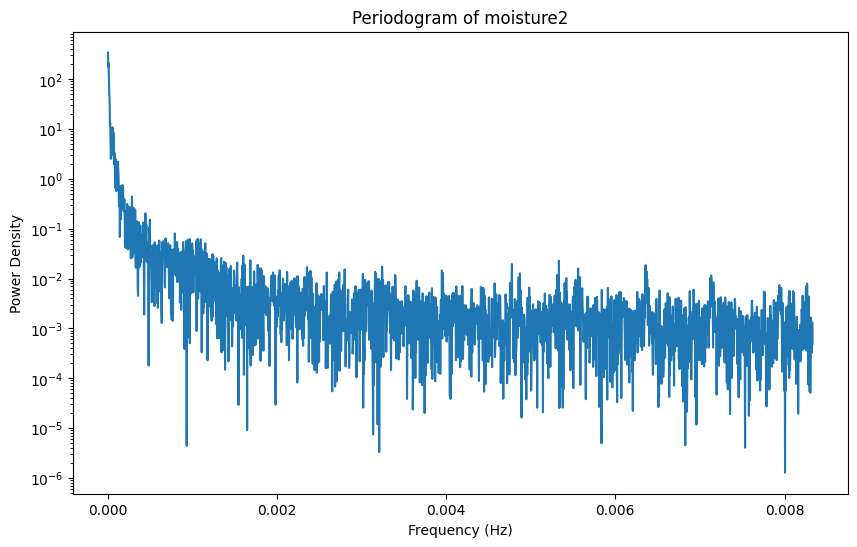

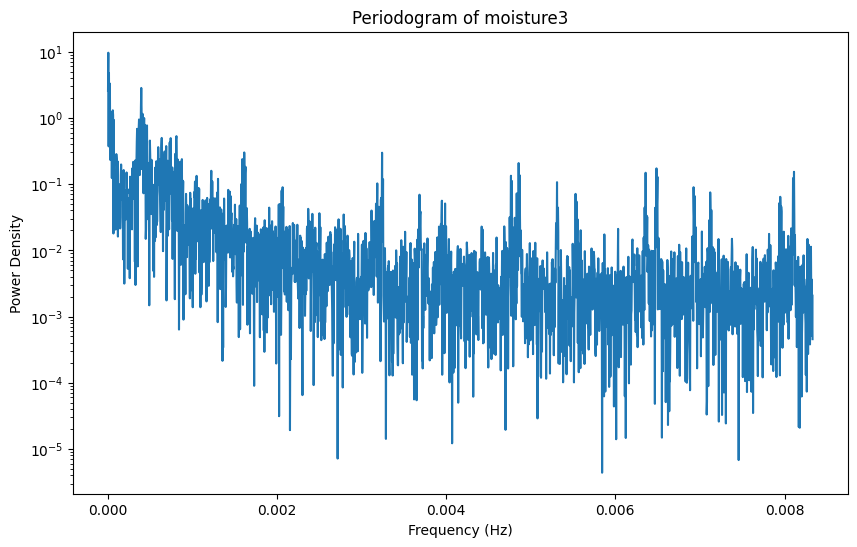

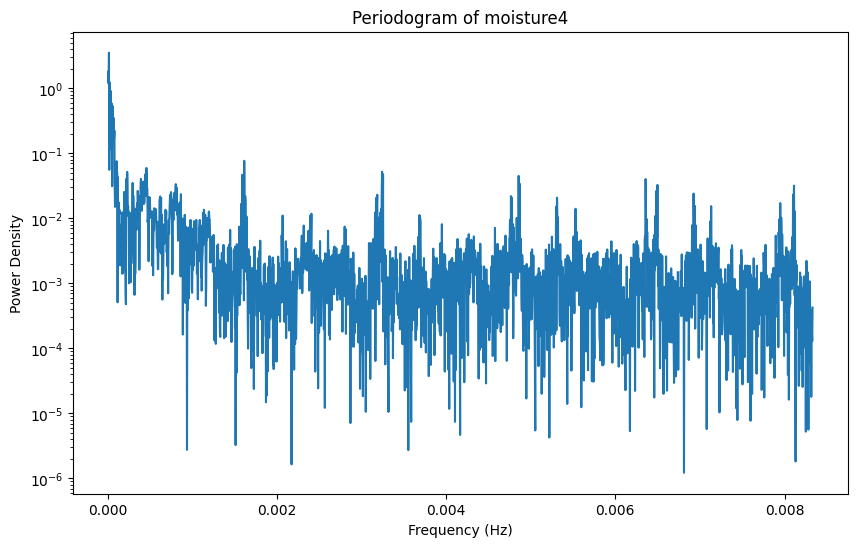

In [182]:
df_soil.dropna(inplace=True)

# Resample the DataFrame to minutes rate
df_resampled = df_soil.resample('min').mean().dropna()

# Extract the time series data for 'moisture0'
time_series = df_resampled['moisture0']

# Sampling rate for data sampled every minute
sampling_rate = 1 / 60 

periodograms = {}
for column in ['moisture0', 'moisture1', 'moisture2', 'moisture3', 'moisture4']:
    frequencies, power_density, dominant_frequency, dominant_power = f.compute_periodogram(df_resampled[column], sampling_rate)
    periodograms[column] = {
        'frequencies': frequencies,
        'power_density': power_density,
        'dominant_frequency': dominant_frequency,
        'dominant_power': dominant_power
    }

#  dominant frequencies
for column, data in periodograms.items():
    if data['dominant_frequency'] is not None:
        print(f"Dominant frequency for {column}: {data['dominant_frequency']} Hz with power density {data['dominant_power']}")
    else:
        print(f"No dominant frequency found for {column}")

frequencies, power_density, dominant_frequency, dominant_power = f.compute_periodogram(time_series, sampling_rate)


# Plot periodograms for each moisture level
#for column in ['moisture0', 'moisture1', 'moisture2', 'moisture3', 'moisture4']:
f.plot_periodogram('moisture0', periodograms)
f.plot_periodogram('moisture1', periodograms)
f.plot_periodogram('moisture2', periodograms)
f.plot_periodogram('moisture3', periodograms)
f.plot_periodogram('moisture4', periodograms)